# Principal Component Analysis (PCA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)

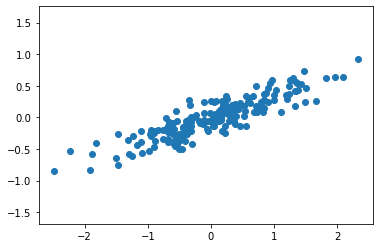

In [ ]:
# Vamos a explicar los parametros del modelo con un ejemplo simple
# Generamos un arreglo aleatorio de datos

# rng = np.random
rng = np.random.RandomState(1)
components = rng.rand(2, 2)
X = np.dot(components, rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
X_pca = pca.transform(X)

In [ ]:
print(f'PCA components: \n{pca.components_}')
print(f'PCA Explained variance: {pca.explained_variance_}')

PCA components: 
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
PCA Explained variance: [0.7625315 0.0184779]


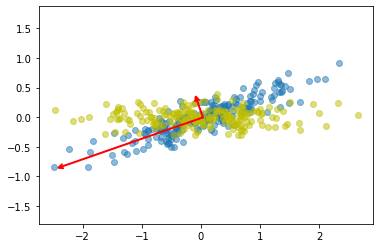

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, 
                    shrinkB=0,
                    color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c='y')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

# Importamos dataset

In [ ]:
df = pd.read_csv("dataset_agricultura.csv")

In [ ]:
df.head()

,ID,Cantidad_estimada_insectos,Cultivo_Tipo,Suelo_Tipo,Pesticide_Use_Categoria,Numero_Dosis_Semana,Numero_Semanas_Usado,Numero_Semanas_Dejado,Estacion,Cultivo_Daño,...,Numero_Dosis_Semana_lag1,Numero_Semanas_Usado_lag1,Numero_Semanas_Dejado_lag1,Cultivo_Daño_lag2,Cantidad_estimada_insectos_lag2,Cultivo_Tipo_lag2,Suelo_Tipo_lag2,Numero_Dosis_Semana_lag2,Numero_Semanas_Usado_lag2,Numero_Semanas_Dejado_lag2
0,F00000001,188,1,0,1,0,0.0,0,1,0,...,-999,-999.0,-999,-999,-999,-999,-999,-999,-999.0,-999
1,F00000003,209,1,0,1,0,0.0,0,2,1,...,0,0.0,0,-999,-999,1,0,-999,-999.0,-999
2,F00000004,257,1,0,1,0,0.0,0,2,1,...,0,0.0,0,0,188,1,0,0,0.0,0
3,F00000005,257,1,1,1,0,0.0,0,2,1,...,0,0.0,0,1,209,1,0,0,0.0,0
4,F00000006,342,1,0,1,0,0.0,0,2,1,...,0,0.0,0,1,257,1,1,0,0.0,0


In [ ]:
df.drop(columns='ID', inplace=True)

# Preparamos la data

In [ ]:
X = df.drop('Cultivo_Daño', axis=1)
y = df['Cultivo_Daño']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 15)

In [ ]:
# Ahora vamos a ver como utilizarlo con el dataset

# Inicializamos el PCA
pca = PCA(n_components=12, 
          svd_solver='full')

# Entrenamos con los datos de prueba
pca.fit(X_train)

# convertimos tanto el X_train como el X_test
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

In [ ]:
pca.explained_variance_ratio_.sum()

0.8767198556584906

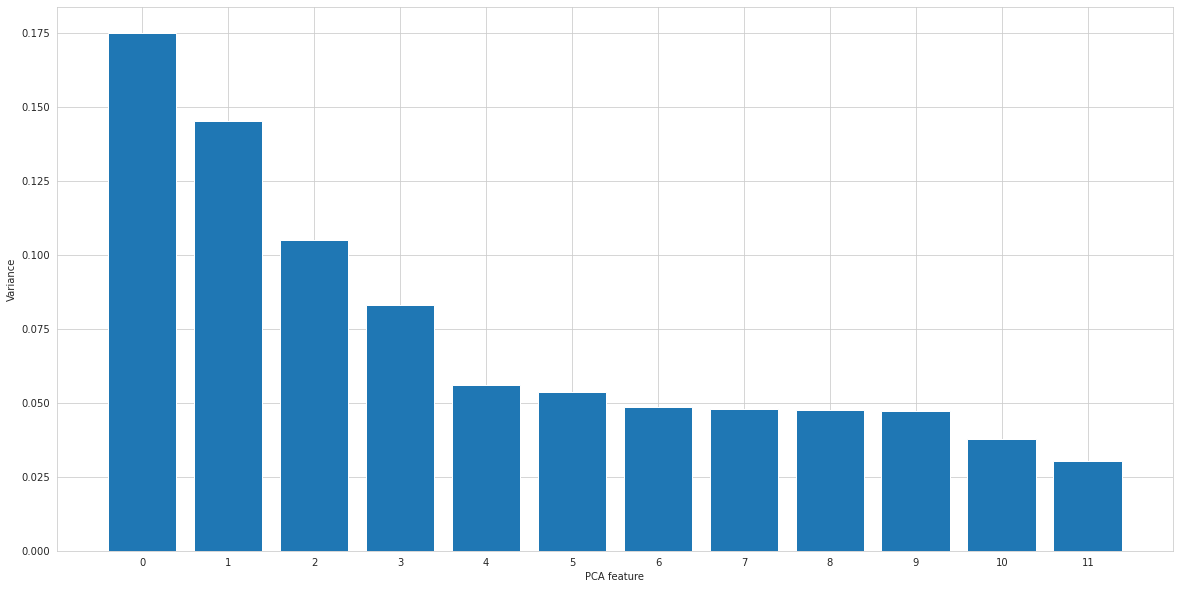

In [ ]:
# ahora vamos a ver la varianza que tienen las variables del PCA
sns.set_style('whitegrid')

features = range(pca.n_components_)
plt.figure(figsize=(20, 10))

plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('Variance')

plt.show()

# Predicciones

Luego de realizar el analisis de componentes principales, podemos utilizar el resultado para armar un modelo de prediccion. En este caso volveremos a utilizar la regresion logistica, pero cambiaremos un poco el modelado del PCA.

In [ ]:
# importamos la libreria de regresion logistica
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)

print('Los resultados son con todas las variables: \n')
print('El accuracy de prueba es de: {}'.format(lr.score(X_train, y_train)))
print('El accuracy de validacion es de: {}'.format(lr.score(X_val, y_val)))

Los resultados son: 

El accuracy de prueba es de: 0.8582139943167431
El accuracy de test es de: 0.8610173306324556


In [ ]:
lr = LogisticRegression(max_iter=10000)

lr.fit(X_train_pca, y_train)

print(f'Los resultados aplicando pca con {pca.n_components_} componentes principales: \n')
print('El accuracy de prueba es de: {}'.format(lr.score(X_train_pca, y_train)))
print('El accuracy de test es de: {}'.format(lr.score(X_val_pca, y_val)))

Los resultados luego del pca con 12 componentes principales: 

El accuracy de prueba es de: 0.8393073178966323
El accuracy de test es de: 0.8436866981769074


# Actividad

Replicar ejercicio cambiando la cantidad de componentes principales y definir un valor de componentes que explique el 0.999 de la varianza